In [1]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('./CSVs/full_merged_data.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.head()

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Rim,Short Mid,Long Mid,All Mid,Corner Three,Non Corner,All Three,Pts/Poss,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,105.8,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,112.2,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,113.4,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8
3,LA Clippers,111.5,0.529,0.160,0.315,20.4,103.7,0.496,0.177,0.294,22.9,2013,LA Clippers 2013,0.529,0.508,0.658,0.421,0.406,0.412,0.387,0.353,0.365,111.5,90.9,0.327,0.780,20.6,18.5,108.5,4.7,0.171,126.1,2.9,0.636,143.5,1.8,0.294,116.9
4,San Antonio,108.0,0.531,0.154,0.232,20.6,101.1,0.482,0.156,0.271,18.0,2013,San Antonio 2013,0.532,0.509,0.634,0.417,0.425,0.421,0.412,0.360,0.379,108.0,95.1,0.235,0.820,13.4,12.3,106.8,2.6,0.145,117.3,1.9,0.573,134.6,0.7,0.263,107.3


### KMeans Clustering Model

In [4]:
# Define X
X = df.select_dtypes(include=np.number) # only numeric columns

In [5]:
# Scale the data
ss = StandardScaler()                          
X_scaled = ss.fit_transform(X)

In [12]:
km = KMeans(n_clusters = 4, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

C:\Users\aorfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


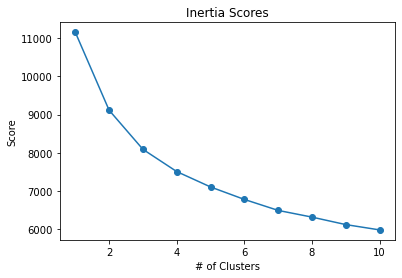

In [13]:
# at which point is our elbow?  Seems to be around 3

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

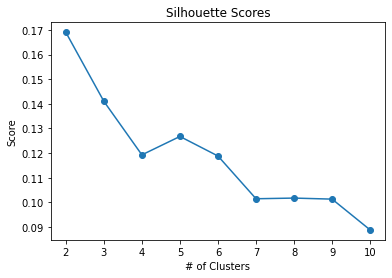

In [14]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Post-Model EDA

In [17]:
df['cluster'] = km.labels_
df.head(3)

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Rim,Short Mid,Long Mid,All Mid,Corner Three,Non Corner,All Three,Pts/Poss,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,cluster
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,105.8,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,1
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,112.2,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2,1
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,113.4,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8,0


In [18]:
df['cluster'].value_counts(normalize = True)

2    0.270968
0    0.264516
3    0.251613
1    0.212903
Name: cluster, dtype: float64

In [29]:
df.groupby(by = 'cluster').mean().T

cluster,0,1,2,3
OFFENSE: Pts/Poss,113.304878,105.930303,109.132143,106.183333
OFFENSE: eFG%,0.544195,0.496288,0.520571,0.505808
OFFENSE: TOV%,0.138671,0.157652,0.144548,0.146705
OFFENSE: ORB%,0.252024,0.296485,0.263655,0.256526
OFFENSE: FT Rate,20.223171,21.477273,19.358333,20.129487
DEFENSE: Pts/Poss,109.604878,106.728788,111.495238,106.852564
DEFENSE: eFG%,0.523841,0.503545,0.533917,0.506872
DEFENSE: TOV%,0.142963,0.153939,0.141071,0.149179
DEFENSE: ORB%,0.257000,0.284303,0.258238,0.268910
DEFENSE: FT Rate,19.462195,21.133333,19.775000,20.770513
